In [1]:
# imports
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("./test1.csv")

In [3]:
df["TARGET"].value_counts()

0    281818
1     24771
Name: TARGET, dtype: int64

In [4]:
df.head()

,Unnamed: 0,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMP_PHONE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_PHONE,AMT_REQ_CREDIT_BUREAU_YEAR,...,EMPLOYMENT_YEARS,LIVE_CITY_NOT_WORK_CITY,CNT_CHILDREN,AMT_INCOME_TOTAL,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_QRT,FLAG_EMAIL,TARGET
0,1,1,1,1,1,1,2.0,0,1,0.0,...,3.254795,0,0,270000.0,1.0,1.0,1129500.0,0.0,0,0
1,2,1,1,1,2,2,1.0,1,1,0.0,...,0.616438,0,0,67500.0,0.0,0.0,135000.0,0.0,0,0
2,3,1,1,1,2,2,2.0,0,0,1.0,...,8.326027,0,0,135000.0,2.0,2.0,297000.0,0.0,0,0
3,4,1,1,1,2,2,1.0,0,0,0.0,...,8.323288,1,0,121500.0,0.0,0.0,513000.0,0.0,0,0
4,5,1,1,1,2,2,2.0,0,1,1.0,...,4.350685,0,0,99000.0,0.0,0.0,454500.0,1.0,0,0


In [5]:
df.columns

Index(['Unnamed: 0', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMP_PHONE',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'CNT_FAM_MEMBERS', 'FLAG_OWN_CAR', 'FLAG_PHONE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_WORK_PHONE', 'DAYS_EMPLOYED', 'EMPLOYMENT_YEARS',
       'LIVE_CITY_NOT_WORK_CITY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'AMT_GOODS_PRICE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'FLAG_EMAIL', 'TARGET'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df.head()

,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMP_PHONE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_PHONE,AMT_REQ_CREDIT_BUREAU_YEAR,REG_CITY_NOT_WORK_CITY,...,EMPLOYMENT_YEARS,LIVE_CITY_NOT_WORK_CITY,CNT_CHILDREN,AMT_INCOME_TOTAL,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_QRT,FLAG_EMAIL,TARGET
0,1,1,1,1,1,2.0,0,1,0.0,0,...,3.254795,0,0,270000.0,1.0,1.0,1129500.0,0.0,0,0
1,1,1,1,2,2,1.0,1,1,0.0,0,...,0.616438,0,0,67500.0,0.0,0.0,135000.0,0.0,0,0
2,1,1,1,2,2,2.0,0,0,1.0,0,...,8.326027,0,0,135000.0,2.0,2.0,297000.0,0.0,0,0
3,1,1,1,2,2,1.0,0,0,0.0,1,...,8.323288,1,0,121500.0,0.0,0.0,513000.0,0.0,0,0
4,1,1,1,2,2,2.0,0,1,1.0,0,...,4.350685,0,0,99000.0,0.0,0.0,454500.0,1.0,0,0


In [8]:
df.describe()

,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMP_PHONE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_PHONE,AMT_REQ_CREDIT_BUREAU_YEAR,REG_CITY_NOT_WORK_CITY,...,EMPLOYMENT_YEARS,LIVE_CITY_NOT_WORK_CITY,CNT_CHILDREN,AMT_INCOME_TOTAL,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_QRT,FLAG_EMAIL,TARGET
count,306589.0,306589.000000,306589.000000,306589.000000,306589.000000,306589.000000,306589.000000,306589.000000,306589.000000,306589.000000,...,306589.000000,306589.000000,306589.000000,306589.000000,306589.000000,306589.000000,3.065890e+05,306589.000000,306589.000000,306589.000000
mean,1.0,0.998177,0.819508,2.032281,2.053224,2.152318,0.339706,0.280542,1.779767,0.230484,...,185.928428,0.179550,0.416757,166330.655672,1.418632,1.401733,5.371743e+05,0.229738,0.056538,0.080795
std,0.0,0.042661,0.384598,0.502241,0.508527,0.910484,0.473610,0.449265,1.766057,0.421144,...,382.356668,0.383813,0.721867,86167.197011,2.399053,2.377865,3.676598e+05,0.744644,0.230959,0.272521
min,1.0,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,25650.000000,0.000000,0.000000,4.050000e+04,0.000000,0.000000,0.000000
25%,1.0,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,...,2.556164,0.000000,0.000000,112500.000000,0.000000,0.000000,2.385000e+05,0.000000,0.000000,0.000000
50%,1.0,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,...,6.079452,0.000000,0.000000,144000.000000,0.000000,0.000000,4.500000e+05,0.000000,0.000000,0.000000
75%,1.0,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,1.000000,3.000000,0.000000,...,15.673973,0.000000,1.000000,202500.000000,2.000000,2.000000,6.795000e+05,0.000000,0.000000,0.000000
max,1.0,1.000000,1.000000,3.000000,3.000000,20.000000,1.000000,1.000000,25.000000,1.000000,...,1000.665753,1.000000,19.000000,749331.000000,348.000000,344.000000,4.050000e+06,261.000000,1.000000,1.000000


In [9]:
df["EMPLOYMENT_YEARS"].describe()

count    306589.000000
mean        185.928428
std         382.356668
min           0.000000
25%           2.556164
50%           6.079452
75%          15.673973
max        1000.665753
Name: EMPLOYMENT_YEARS, dtype: float64

In [10]:
df[df["EMPLOYMENT_YEARS"] == 0]

,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMP_PHONE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_PHONE,AMT_REQ_CREDIT_BUREAU_YEAR,REG_CITY_NOT_WORK_CITY,...,EMPLOYMENT_YEARS,LIVE_CITY_NOT_WORK_CITY,CNT_CHILDREN,AMT_INCOME_TOTAL,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_QRT,FLAG_EMAIL,TARGET
21727,1,1,1,2,2,3.0,0,0,4.0,0,...,0.0,0,2,189000.0,0.0,0.0,904500.0,0.0,0,0
291702,1,1,1,2,2,3.0,0,1,1.0,0,...,0.0,1,1,112500.0,0.0,0.0,112500.0,0.0,0,1


In [11]:
emp_years = df['EMPLOYMENT_YEARS']
bins=[0,5,10,15,20,25,30,35,40,45,50]
bin_category=["0-5","5-10","10-15","15-20","20-25","25-30","30-35","35-40","40-45","45 Above"]
df["EMPLOYMENT_YEARS_RANGE"]=pd.cut(df["EMPLOYMENT_YEARS"],bins=bins,labels=bin_category)

In [12]:
df["EMPLOYMENT_YEARS_RANGE"].value_counts(normalize=True)*100

0-5         54.084398
5-10        25.720267
10-15       10.919323
15-20        4.291155
20-25        2.477105
25-30        1.314569
30-35        0.770912
35-40        0.329538
40-45        0.083180
45 Above     0.009552
Name: EMPLOYMENT_YEARS_RANGE, dtype: float64

In [13]:
# standard scale the data


In [14]:
df0 = df[df["TARGET"]==0]
df1 = df[df["TARGET"]==1]

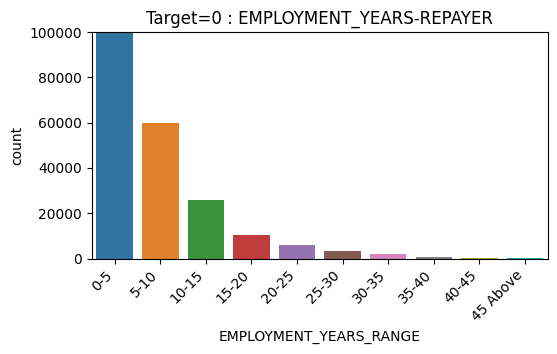

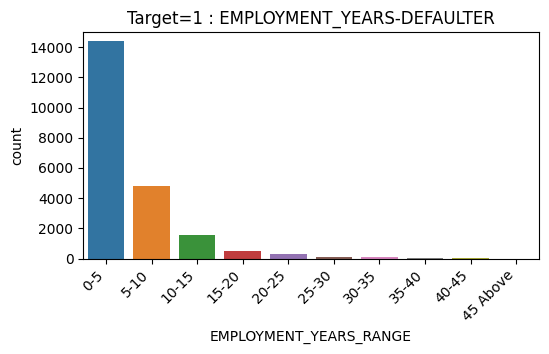

In [15]:
#Creating plots for Employment_years_range for REPAYER
plt.figure(figsize = (20,10))
plt.subplot(3, 3, 2)
plt.ylim(0,100000)
plt.title("Target=0 : EMPLOYMENT_YEARS-REPAYER")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=df0["EMPLOYMENT_YEARS_RANGE"])
plt.show()


#Creating plots for Employment_years_range for DEFAULTER
plt.figure(figsize = (20,10))
plt.subplot(3, 3, 2)
plt.ylim(0,15000)
plt.title("Target=1 : EMPLOYMENT_YEARS-DEFAULTER")
plt.xticks(rotation=45, ha='right')
sns.countplot(x=df1["EMPLOYMENT_YEARS_RANGE"])
plt.show()


In [16]:
df.columns

Index(['FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMP_PHONE',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'CNT_FAM_MEMBERS', 'FLAG_OWN_CAR', 'FLAG_PHONE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_WORK_PHONE', 'DAYS_EMPLOYED', 'EMPLOYMENT_YEARS',
       'LIVE_CITY_NOT_WORK_CITY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'AMT_GOODS_PRICE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'FLAG_EMAIL', 'TARGET',
       'EMPLOYMENT_YEARS_RANGE'],
      dtype='object')

<AxesSubplot: >

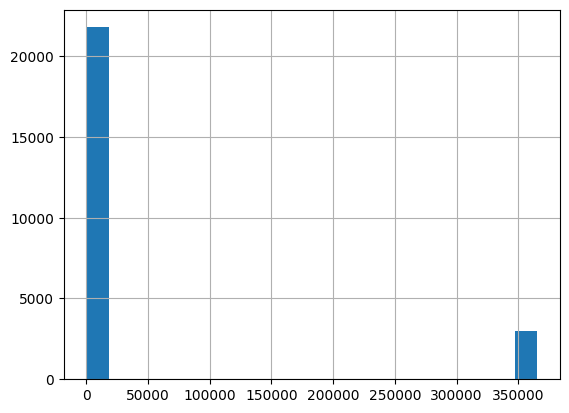

In [17]:
df1['DAYS_EMPLOYED'].hist(bins=20) 

In [18]:
temp =df[df["EMPLOYMENT_YEARS_RANGE"] == "45 Above"]

In [19]:
temp["EMPLOYMENT_YEARS"]

32250     48.030137
35835     46.161644
57531     45.309589
60220     45.202740
64264     45.010959
64594     45.191781
98895     45.073973
130428    47.041096
131171    46.956164
131172    45.619178
144427    45.153425
148810    45.183562
150916    45.693151
191334    48.071233
200455    45.936986
209240    45.498630
214536    48.005479
221242    45.567123
228260    46.126027
250184    48.172603
257020    45.191781
257480    49.073973
272077    46.169863
273002    45.353425
Name: EMPLOYMENT_YEARS, dtype: float64

In [20]:
df[df["EMPLOYMENT_YEARS_RANGE"]=="45 Above"].describe()

,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMP_PHONE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_PHONE,AMT_REQ_CREDIT_BUREAU_YEAR,REG_CITY_NOT_WORK_CITY,...,EMPLOYMENT_YEARS,LIVE_CITY_NOT_WORK_CITY,CNT_CHILDREN,AMT_INCOME_TOTAL,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_QRT,FLAG_EMAIL,TARGET
count,24.0,24.0,24.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.000000,24.0,24.000000,24.000000,24.000000,2.400000e+01,24.000000,24.0,24.0
mean,1.0,1.0,1.0,1.958333,1.958333,1.583333,0.125000,0.500000,1.750000,0.125000,...,46.199772,0.125000,0.0,166875.000000,1.666667,1.666667,4.498125e+05,0.416667,0.0,0.0
std,0.0,0.0,0.0,0.464306,0.464306,0.503610,0.337832,0.510754,1.674619,0.337832,...,1.223889,0.337832,0.0,56640.600356,2.180281,2.180281,4.285387e+05,0.775532,0.0,0.0
min,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,45.010959,0.000000,0.0,67500.000000,0.000000,0.000000,7.650000e+04,0.000000,0.0,0.0
25%,1.0,1.0,1.0,2.000000,2.000000,1.000000,0.000000,0.000000,0.750000,0.000000,...,45.200000,0.000000,0.0,135000.000000,0.000000,0.000000,2.250000e+05,0.000000,0.0,0.0
50%,1.0,1.0,1.0,2.000000,2.000000,2.000000,0.000000,0.500000,1.000000,0.000000,...,45.656164,0.000000,0.0,164250.000000,1.000000,1.000000,2.250000e+05,0.000000,0.0,0.0
75%,1.0,1.0,1.0,2.000000,2.000000,2.000000,0.000000,1.000000,3.000000,0.000000,...,46.977397,0.000000,0.0,185625.000000,3.000000,3.000000,6.750000e+05,1.000000,0.0,0.0
max,1.0,1.0,1.0,3.000000,3.000000,2.000000,1.000000,1.000000,6.000000,1.000000,...,49.073973,1.000000,0.0,328500.000000,9.000000,9.000000,1.678500e+06,3.000000,0.0,0.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306589 entries, 0 to 306588
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   FLAG_MOBIL                   306589 non-null  int64   
 1   FLAG_CONT_MOBILE             306589 non-null  int64   
 2   FLAG_EMP_PHONE               306589 non-null  int64   
 3   REGION_RATING_CLIENT_W_CITY  306589 non-null  int64   
 4   REGION_RATING_CLIENT         306589 non-null  int64   
 5   CNT_FAM_MEMBERS              306589 non-null  float64 
 6   FLAG_OWN_CAR                 306589 non-null  int64   
 7   FLAG_PHONE                   306589 non-null  int64   
 8   AMT_REQ_CREDIT_BUREAU_YEAR   306589 non-null  float64 
 9   REG_CITY_NOT_WORK_CITY       306589 non-null  int64   
 10  FLAG_WORK_PHONE              306589 non-null  int64   
 11  DAYS_EMPLOYED                306589 non-null  int64   
 12  EMPLOYMENT_YEARS             306589 non-null

In [22]:
df[df["DAYS_EMPLOYED"]==365243].head() # 1000 years of employment age

,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMP_PHONE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_PHONE,AMT_REQ_CREDIT_BUREAU_YEAR,REG_CITY_NOT_WORK_CITY,...,LIVE_CITY_NOT_WORK_CITY,CNT_CHILDREN,AMT_INCOME_TOTAL,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_QRT,FLAG_EMAIL,TARGET,EMPLOYMENT_YEARS_RANGE
7,1,1,0,2,2,2.0,0,0,1.0,0,...,0,0,112500.000,1.0,1.0,913500.0,0.0,0,0,NaN
10,1,1,0,2,2,2.0,0,1,2.0,0,...,0,0,38419.155,0.0,0.0,135000.0,0.0,0,0,NaN
22,1,1,0,3,3,2.0,0,1,3.0,0,...,0,0,83250.000,0.0,0.0,225000.0,0.0,0,0,NaN
36,1,1,0,2,2,2.0,0,1,2.0,0,...,0,0,99000.000,0.0,0.0,225000.0,0.0,0,0,NaN
39,1,1,0,2,2,1.0,0,0,3.0,0,...,0,0,108000.000,0.0,0.0,675000.0,0.0,0,0,NaN


In [23]:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
  
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

In [24]:
df.columns

Index(['FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMP_PHONE',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'CNT_FAM_MEMBERS', 'FLAG_OWN_CAR', 'FLAG_PHONE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_WORK_PHONE', 'DAYS_EMPLOYED', 'EMPLOYMENT_YEARS',
       'LIVE_CITY_NOT_WORK_CITY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'AMT_GOODS_PRICE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'FLAG_EMAIL', 'TARGET',
       'EMPLOYMENT_YEARS_RANGE'],
      dtype='object')

In [25]:
columns = ['FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMP_PHONE',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'CNT_FAM_MEMBERS', 'FLAG_OWN_CAR', 'FLAG_PHONE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_WORK_PHONE', 'DAYS_EMPLOYED', 'EMPLOYMENT_YEARS',
       'LIVE_CITY_NOT_WORK_CITY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'AMT_GOODS_PRICE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'FLAG_EMAIL', 'TARGET',]

X = df[columns]
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42, shuffle=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306589 entries, 0 to 306588
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   FLAG_MOBIL                   306589 non-null  int64   
 1   FLAG_CONT_MOBILE             306589 non-null  int64   
 2   FLAG_EMP_PHONE               306589 non-null  int64   
 3   REGION_RATING_CLIENT_W_CITY  306589 non-null  int64   
 4   REGION_RATING_CLIENT         306589 non-null  int64   
 5   CNT_FAM_MEMBERS              306589 non-null  float64 
 6   FLAG_OWN_CAR                 306589 non-null  int64   
 7   FLAG_PHONE                   306589 non-null  int64   
 8   AMT_REQ_CREDIT_BUREAU_YEAR   306589 non-null  float64 
 9   REG_CITY_NOT_WORK_CITY       306589 non-null  int64   
 10  FLAG_WORK_PHONE              306589 non-null  int64   
 11  DAYS_EMPLOYED                306589 non-null  int64   
 12  EMPLOYMENT_YEARS             306589 non-null

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306589 entries, 0 to 306588
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   FLAG_MOBIL                   306589 non-null  int64   
 1   FLAG_CONT_MOBILE             306589 non-null  int64   
 2   FLAG_EMP_PHONE               306589 non-null  int64   
 3   REGION_RATING_CLIENT_W_CITY  306589 non-null  int64   
 4   REGION_RATING_CLIENT         306589 non-null  int64   
 5   CNT_FAM_MEMBERS              306589 non-null  float64 
 6   FLAG_OWN_CAR                 306589 non-null  int64   
 7   FLAG_PHONE                   306589 non-null  int64   
 8   AMT_REQ_CREDIT_BUREAU_YEAR   306589 non-null  float64 
 9   REG_CITY_NOT_WORK_CITY       306589 non-null  int64   
 10  FLAG_WORK_PHONE              306589 non-null  int64   
 11  DAYS_EMPLOYED                306589 non-null  int64   
 12  EMPLOYMENT_YEARS             306589 non-null

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183953 entries, 229040 to 121958
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   FLAG_MOBIL                   183953 non-null  int64  
 1   FLAG_CONT_MOBILE             183953 non-null  int64  
 2   FLAG_EMP_PHONE               183953 non-null  int64  
 3   REGION_RATING_CLIENT_W_CITY  183953 non-null  int64  
 4   REGION_RATING_CLIENT         183953 non-null  int64  
 5   CNT_FAM_MEMBERS              183953 non-null  float64
 6   FLAG_OWN_CAR                 183953 non-null  int64  
 7   FLAG_PHONE                   183953 non-null  int64  
 8   AMT_REQ_CREDIT_BUREAU_YEAR   183953 non-null  float64
 9   REG_CITY_NOT_WORK_CITY       183953 non-null  int64  
 10  FLAG_WORK_PHONE              183953 non-null  int64  
 11  DAYS_EMPLOYED                183953 non-null  int64  
 12  EMPLOYMENT_YEARS             183953 non-null  float64

In [29]:
# Create logistic regression object
model = LogisticRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

#Predict Output
predicted= model.predict(X_test)

In [30]:
accuracy = metrics.accuracy_score(y_test, predicted)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 91.887%


In [31]:
predicted.sum()

0

In [32]:
# print confusion matrix
print(metrics.confusion_matrix(y_test, predicted))

[[112686      0]
 [  9950      0]]


In [33]:
df.isnull().sum()

FLAG_MOBIL                         0
FLAG_CONT_MOBILE                   0
FLAG_EMP_PHONE                     0
REGION_RATING_CLIENT_W_CITY        0
REGION_RATING_CLIENT               0
CNT_FAM_MEMBERS                    0
FLAG_OWN_CAR                       0
FLAG_PHONE                         0
AMT_REQ_CREDIT_BUREAU_YEAR         0
REG_CITY_NOT_WORK_CITY             0
FLAG_WORK_PHONE                    0
DAYS_EMPLOYED                      0
EMPLOYMENT_YEARS                   0
LIVE_CITY_NOT_WORK_CITY            0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
OBS_30_CNT_SOCIAL_CIRCLE           0
OBS_60_CNT_SOCIAL_CIRCLE           0
AMT_GOODS_PRICE                    0
AMT_REQ_CREDIT_BUREAU_QRT          0
FLAG_EMAIL                         0
TARGET                             0
EMPLOYMENT_YEARS_RANGE         55328
dtype: int64

In [34]:
df.drop(labels=["EMPLOYMENT_YEARS_RANGE"], axis=1, inplace=True)

In [35]:
df.isnull().sum()

FLAG_MOBIL                     0
FLAG_CONT_MOBILE               0
FLAG_EMP_PHONE                 0
REGION_RATING_CLIENT_W_CITY    0
REGION_RATING_CLIENT           0
CNT_FAM_MEMBERS                0
FLAG_OWN_CAR                   0
FLAG_PHONE                     0
AMT_REQ_CREDIT_BUREAU_YEAR     0
REG_CITY_NOT_WORK_CITY         0
FLAG_WORK_PHONE                0
DAYS_EMPLOYED                  0
EMPLOYMENT_YEARS               0
LIVE_CITY_NOT_WORK_CITY        0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
OBS_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
AMT_GOODS_PRICE                0
AMT_REQ_CREDIT_BUREAU_QRT      0
FLAG_EMAIL                     0
TARGET                         0
dtype: int64

### Scaling features of the dataset (to handle imbalanced data)

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [37]:
df1 = df.copy(deep=True)

In [38]:
df1= df1.drop('TARGET', axis=1)

In [39]:
x= df.drop('TARGET',axis=1)
y= df['TARGET']

In [40]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
df_scaled = pd.DataFrame(scaler.fit_transform(x),columns=df1.columns,index=df1.index)

In [41]:
df_scaled.head() # scaled dataframe

,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMP_PHONE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_PHONE,AMT_REQ_CREDIT_BUREAU_YEAR,REG_CITY_NOT_WORK_CITY,...,DAYS_EMPLOYED,EMPLOYMENT_YEARS,LIVE_CITY_NOT_WORK_CITY,CNT_CHILDREN,AMT_INCOME_TOTAL,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_QRT,FLAG_EMAIL
0,0.0,1.0,1.0,0.0,0.0,0.052632,0.0,1.0,0.00,0.0,...,0.003253,0.003253,0.0,0.0,0.337649,0.002874,0.002907,0.271605,0.000000,0.0
1,0.0,1.0,1.0,0.5,0.5,0.000000,1.0,1.0,0.00,0.0,...,0.000616,0.000616,0.0,0.0,0.057829,0.000000,0.000000,0.023569,0.000000,0.0
2,0.0,1.0,1.0,0.5,0.5,0.052632,0.0,0.0,0.04,0.0,...,0.008320,0.008320,0.0,0.0,0.151102,0.005747,0.005814,0.063973,0.000000,0.0
3,0.0,1.0,1.0,0.5,0.5,0.000000,0.0,0.0,0.00,1.0,...,0.008318,0.008318,1.0,0.0,0.132448,0.000000,0.000000,0.117845,0.000000,0.0
4,0.0,1.0,1.0,0.5,0.5,0.052632,0.0,1.0,0.04,0.0,...,0.004348,0.004348,0.0,0.0,0.101357,0.000000,0.000000,0.103255,0.003831,0.0


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x= df_scaled # getting x feature set from scaled data frame
# y has already been taken in line 399

In [44]:
df_scaled.isna().sum()

FLAG_MOBIL                     0
FLAG_CONT_MOBILE               0
FLAG_EMP_PHONE                 0
REGION_RATING_CLIENT_W_CITY    0
REGION_RATING_CLIENT           0
CNT_FAM_MEMBERS                0
FLAG_OWN_CAR                   0
FLAG_PHONE                     0
AMT_REQ_CREDIT_BUREAU_YEAR     0
REG_CITY_NOT_WORK_CITY         0
FLAG_WORK_PHONE                0
DAYS_EMPLOYED                  0
EMPLOYMENT_YEARS               0
LIVE_CITY_NOT_WORK_CITY        0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
OBS_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
AMT_GOODS_PRICE                0
AMT_REQ_CREDIT_BUREAU_QRT      0
FLAG_EMAIL                     0
dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#### SMOTE for imbalanced classification (smaller number of target=1)

In [46]:
from imblearn.over_sampling import SMOTE  # used for imbalanced dataset 

In [47]:
sm = SMOTE(random_state = 500)
X_res, y_res = sm.fit_resample(X_train,y_train)

### Training Prediction model

1. Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
model1 = LogisticRegression(solver='lbfgs', max_iter=100)

In [50]:
model1.fit(X_res, y_res)

LogisticRegression()

In [51]:
#predcit

y_pred1 = model1.predict(X_test)
y_pred1

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [52]:
#scores
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
accuracy = model1.score(X_test, y_test)
accuracy

0.5695880491862096

In [53]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71     56330
           1       0.11      0.62      0.19      4988

    accuracy                           0.57     61318
   macro avg       0.53      0.59      0.45     61318
weighted avg       0.88      0.57      0.66     61318



In [54]:
cm = confusion_matrix(y_test, y_pred1)
cm

array([[31853, 24477],
       [ 1915,  3073]], dtype=int64)

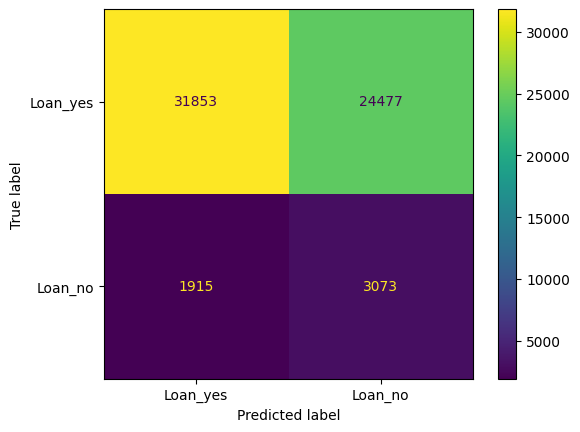

In [55]:
display = ConfusionMatrixDisplay(cm, display_labels = ['Loan_yes', 'Loan_no'])
display.plot()

2. Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score

In [57]:
model2 = RandomForestClassifier(n_estimators = 100)
model2.fit(X_res, y_res)

RandomForestClassifier()

In [58]:
y_pred2 = model2.predict(X_test)
accuracy = model2.score(X_test, y_test)
accuracy

0.9027691705535079

In [59]:
#scores
print('train score', model2.score(X_train, y_train))
print('accuracy', accuracy_score(y_test, y_pred2))
print('precision score', precision_score(y_test, y_pred2))
print('recall', recall_score(y_test, y_pred2))
print('f1 score', f1_score(y_test, y_pred2))

train score 0.9982549914176564
accuracy 0.9027691705535079
precision score 0.12306501547987617
recall 0.03187650360866079
f1 score 0.050636942675159245


In [60]:
cm = confusion_matrix(y_test, y_pred2)

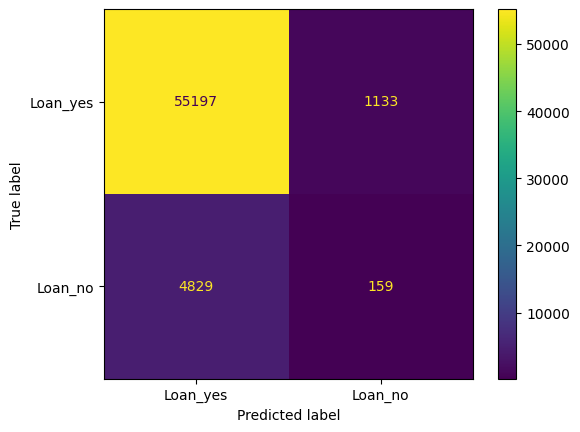

In [61]:
display = ConfusionMatrixDisplay(cm, display_labels = ['Loan_yes', 'Loan_no'])
display.plot()

In [62]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56330
           1       0.12      0.03      0.05      4988

    accuracy                           0.90     61318
   macro avg       0.52      0.51      0.50     61318
weighted avg       0.85      0.90      0.88     61318



3. naive bayes

In [63]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_res, y_res)

GaussianNB()

In [64]:
y_pred3 = model3.predict(X_test)

In [65]:
#scores
print('train score', model3.score(X_train, y_train))
print('accuracy', accuracy_score(y_test, y_pred3))
print('precision score', precision_score(y_test, y_pred3))
print('recall', recall_score(y_test, y_pred3))
print('f1 score', f1_score(y_test, y_pred3))

train score 0.39682229044607803
accuracy 0.3986920643204279
precision score 0.0942916041025119
recall 0.7427826784282278
f1 score 0.16734039430003841


In [66]:
cm = confusion_matrix(y_test, y_pred3)

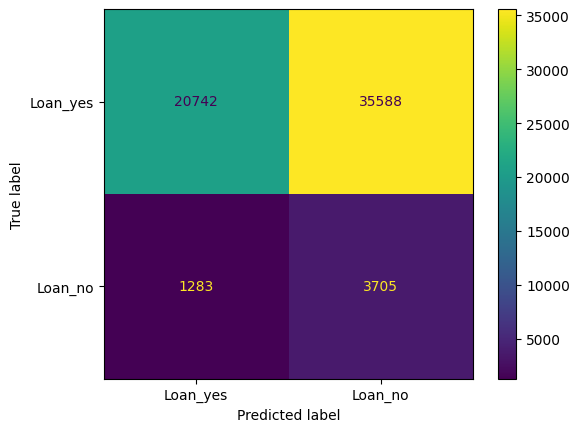

In [67]:
display = ConfusionMatrixDisplay(cm, display_labels = ['Loan_yes', 'Loan_no'])
display.plot()

In [68]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.37      0.53     56330
           1       0.09      0.74      0.17      4988

    accuracy                           0.40     61318
   macro avg       0.52      0.56      0.35     61318
weighted avg       0.87      0.40      0.50     61318



### XGB

In [69]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

0.9122606738641182

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     56330
           1       0.14      0.02      0.03      4988

    accuracy                           0.91     61318
   macro avg       0.53      0.50      0.49     61318
weighted avg       0.86      0.91      0.88     61318



In [71]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[55863,   467],
       [ 4913,    75]], dtype=int64)

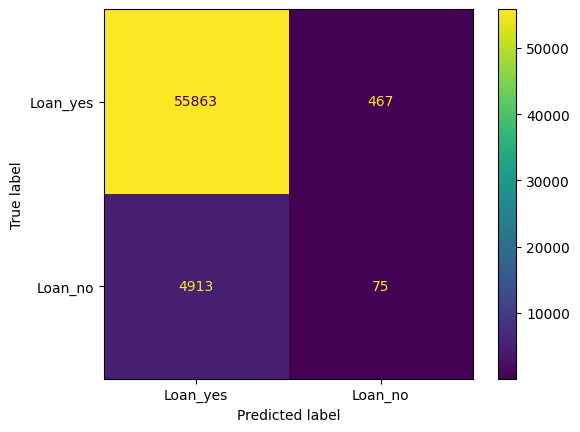

In [72]:
display = ConfusionMatrixDisplay(cm, display_labels = ['Loan_yes', 'Loan_no'])
display.plot()